## Get the necessary files and packages

In [ ]:
%pip install chemfusekit

# Optional: download the example data from the repository (you could upload your own files)
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/rt.xlsx

# Automatically inline the graphs
%matplotlib inline

## First case: fused vs non-fused data

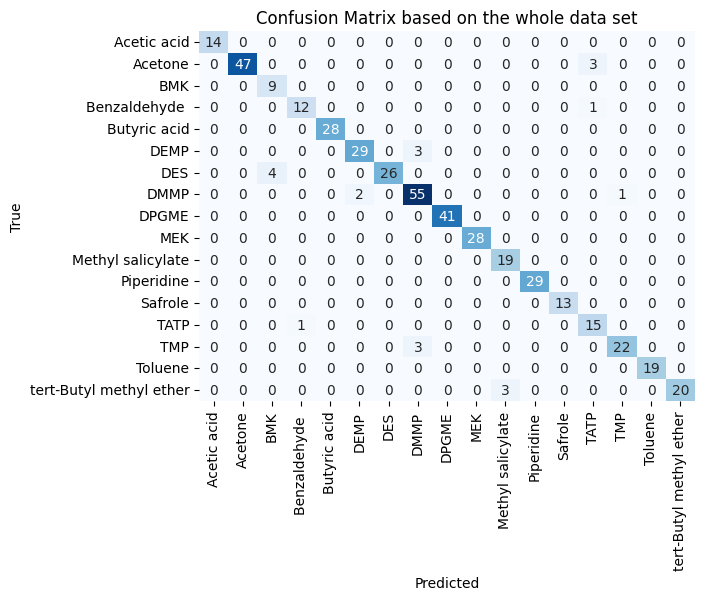

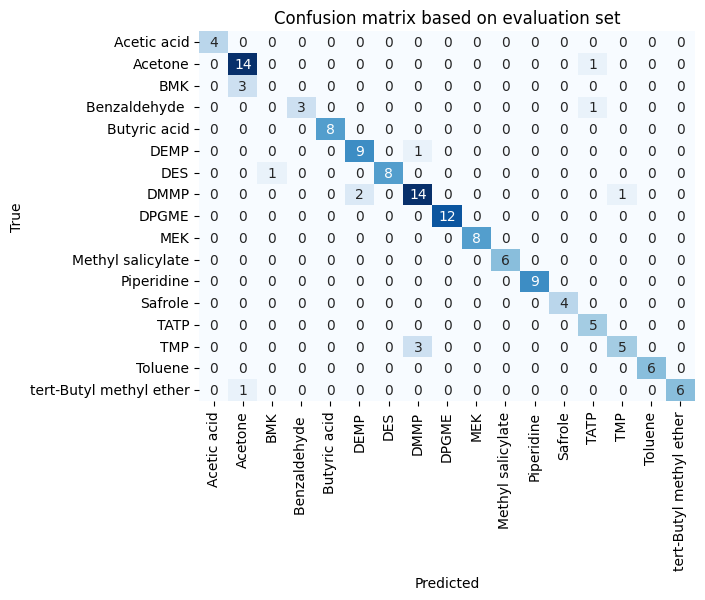

In [1]:
from chemfusekit.df import DFSettings, DF, Table
from chemfusekit.knn import KNNSettings, KNN, GraphMode

# Let's import a table of QEPAS data (needs SNV preprocessing)
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv'
)
df = DF(DFSettings(), [table1])
df.fuse()
data = df.fused_data

# Perform KNN on the imported QEPAS data
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()


The previous analysis (QEPAS-only) produced 4 misplaced samples, with a 97% overall accuracy.

Let's repeat it on GC data.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



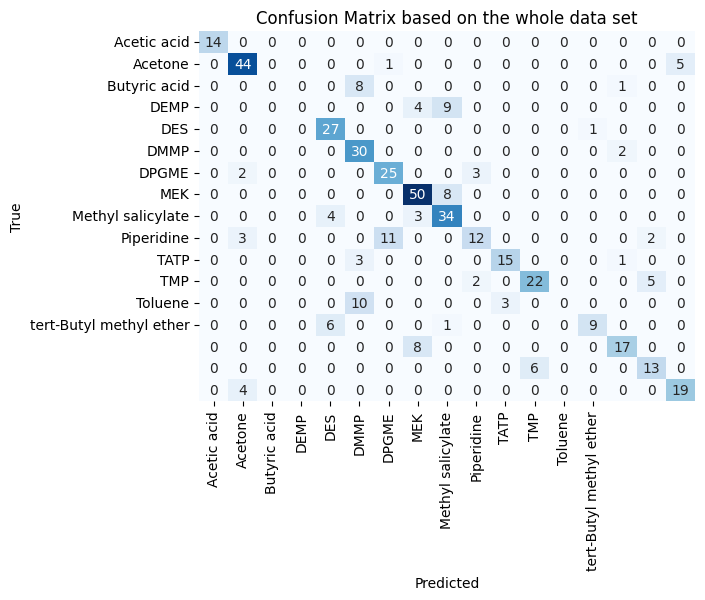

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



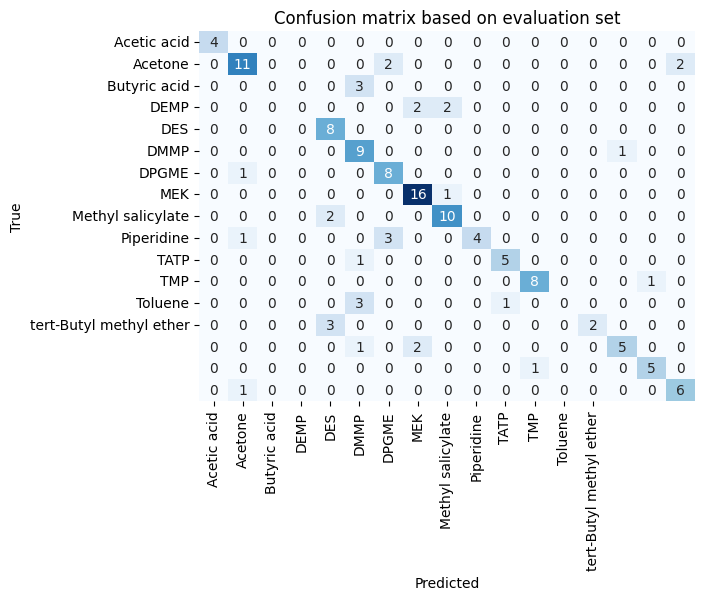

In [2]:
from chemfusekit.__base import BaseDataModel

# Let's import a raw table of QEPAS data
data = BaseDataModel.load_from_file(
    import_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance'
)

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

The GC-only analysis produced a 24.5% accurate model, which is an incredibly low score. Now let's try a low-level data fusion analysis.

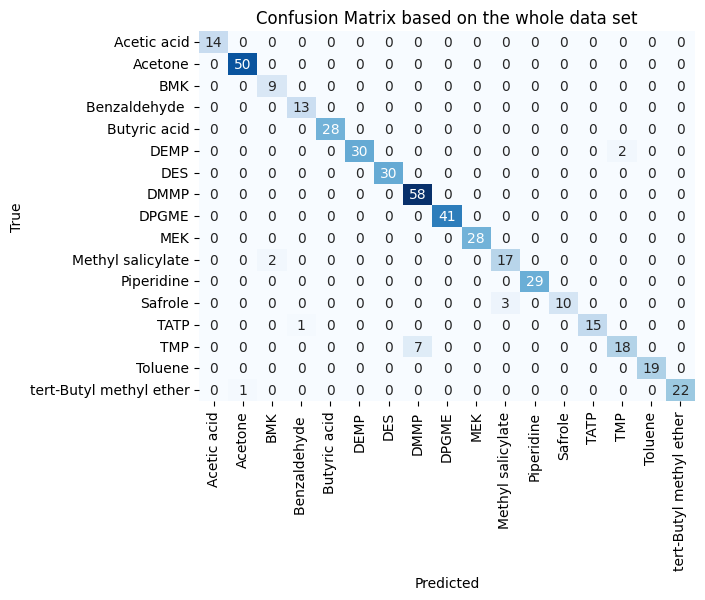

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



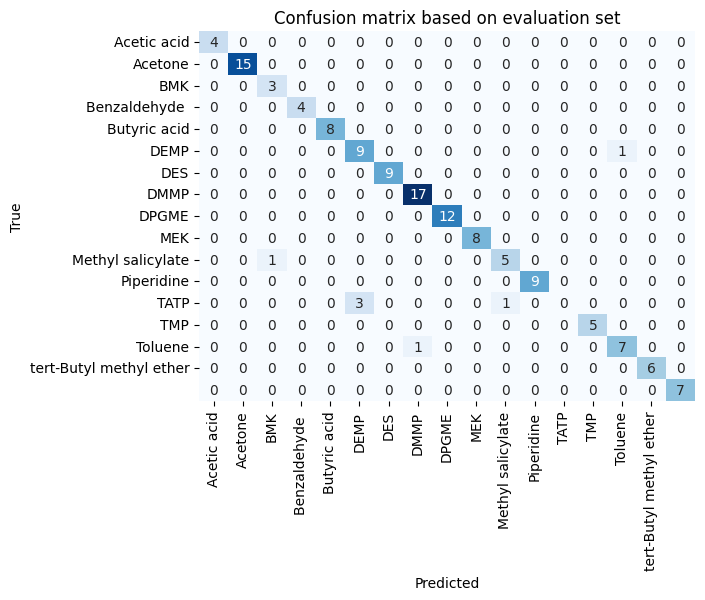

In [4]:
from chemfusekit.df import DFSettings, DF, Table

# QEPAS table
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv'
)

# GC table
table2 = Table(
    file_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='none'
)

# Set up and perform data fusion
df = DF(DFSettings(), [table1, table2])
df.fuse()
data = df.fused_data

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

The precision score and the number of misrecognized samples is almost indistinguishable from the QEPAS-only analysis, already proving a point: without feature reduction, data from high-dimensionality sensors drowns out data from low-dimensionality sensors.

## Second phase: before vs after dimensionality reduction

In this phase of the case study, we will try two different strategies for dimensionality reduction of the incoming data:

1. perform low-level data fusion, and then apply a PLSDA reduction to the fused dataset
2. perform mid-level data fusion by appling PLSDA reduction to the QEPAS data before fusing it to the GC data

                           0         0         1         2         3         4
0                    Acetone -6.362485  0.681810  3.507288 -2.017871  1.247491
1                    Acetone -6.402712 -0.360189  3.353245 -1.470443  1.163197
2                    Acetone -6.172370  1.439044  4.030493 -3.392745  0.944920
3                    Acetone -5.919655 -0.161204  3.544074 -1.971826  1.019713
4                    Acetone -6.892473 -0.690022  3.782174 -1.708565  0.461163
..                       ...       ...       ...       ...       ...       ...
442  tert-Butyl methyl ether  1.929779 -6.449107 -3.897628  1.080127 -0.469620
443  tert-Butyl methyl ether  1.329701 -6.096502 -4.484077  1.631246 -0.683844
444  tert-Butyl methyl ether  5.016349 -7.914050 -4.524405  2.479654 -1.087824
445  tert-Butyl methyl ether  6.060793 -7.882632 -4.568194  2.484623 -1.626469
446  tert-Butyl methyl ether  1.423376 -6.423497 -3.694041  2.019979 -0.059651

[447 rows x 6 columns]


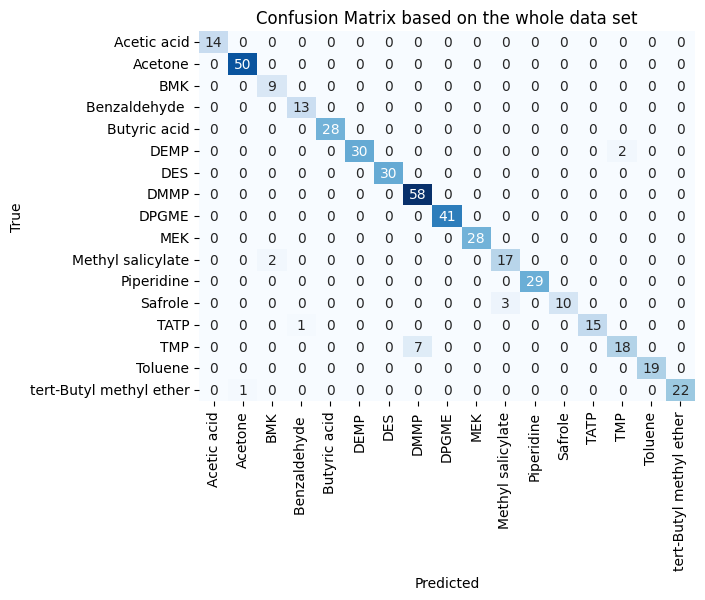

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



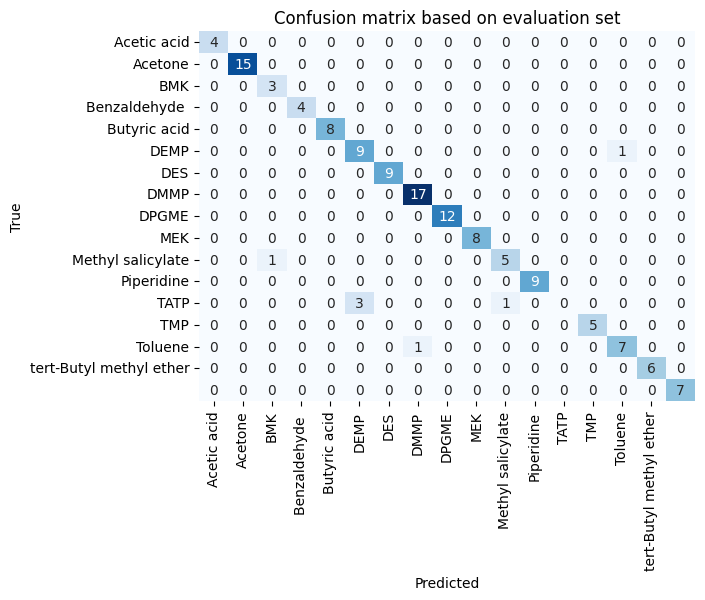

In [5]:
from chemfusekit.plsda import PLSDASettings, PLSDA

# Perform low-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv'
)
table2 = Table(
    file_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='none'
)
df = DF(DFSettings(), [table1, table2])
df.fuse()
data = df.fused_data

# Reduce the dimensionality of the fused dataset
plsda = PLSDA(PLSDASettings(), data)
plsda.train()
data = plsda.rescaled_data
print(plsda.rescaled_data.x_train)

# REMOVE:
data.x_train.columns = ['Substance', '1', '2', '3', '4', '5']

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

The precision is 87% with 26 misplaced samples.

Now let's try mid-level data fusion.

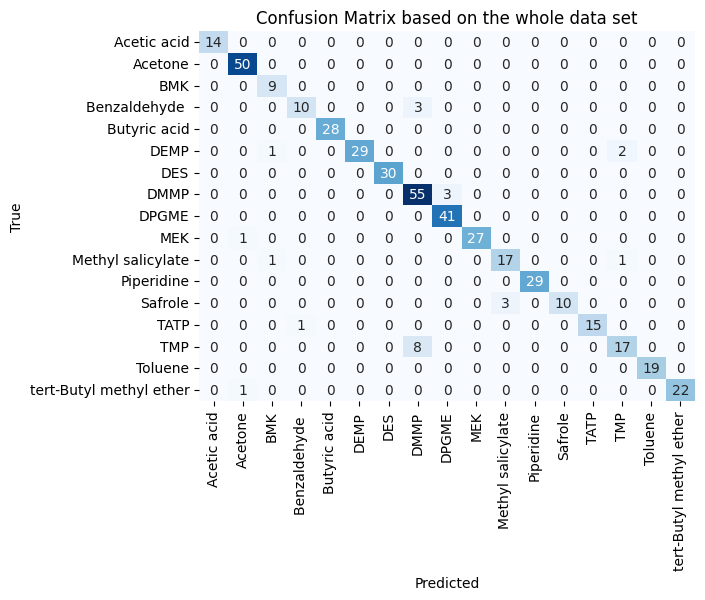

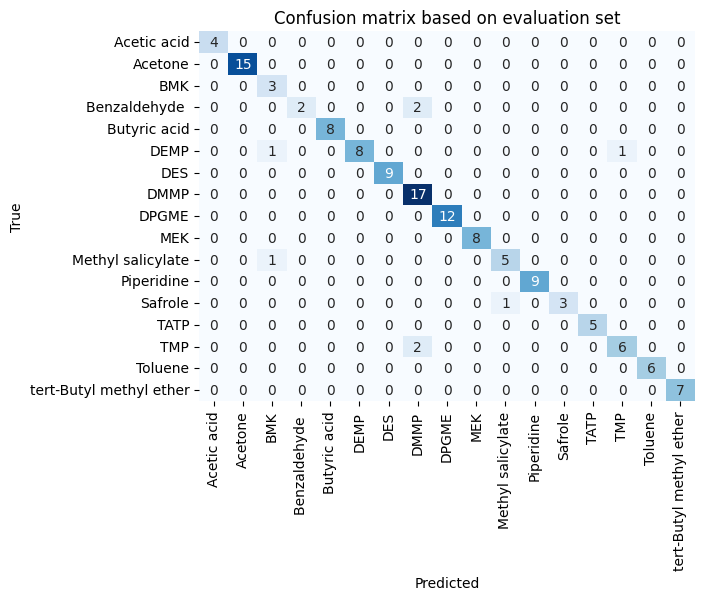

In [8]:
# Perform mid-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv',
    feature_selection='plsda'
)
table2 = Table(
    file_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='none'
)
df = DF(DFSettings(), [table1, table2])
df.fuse()
data = df.fused_data
df.fused_data.x_train.columns = ['Substance', '0', '1', '2', '3', 'tr']
df.fused_data.x_data.columns = ['0', '1', '2', '3', 'tr']

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

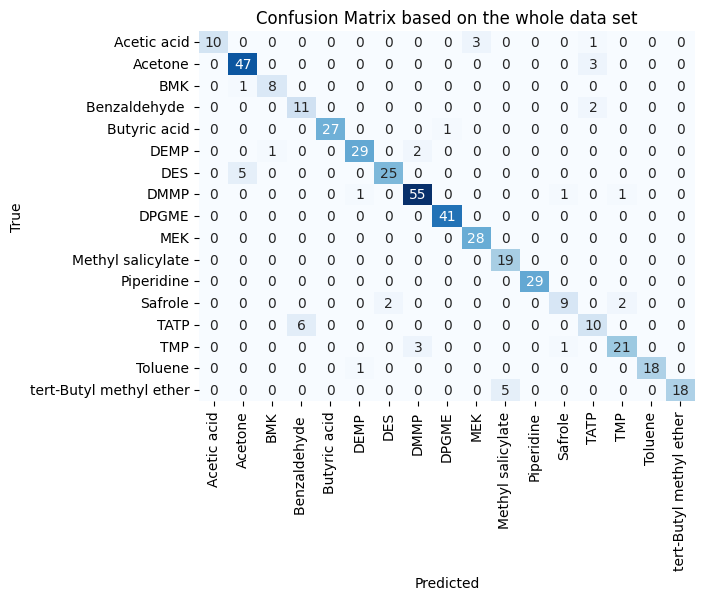

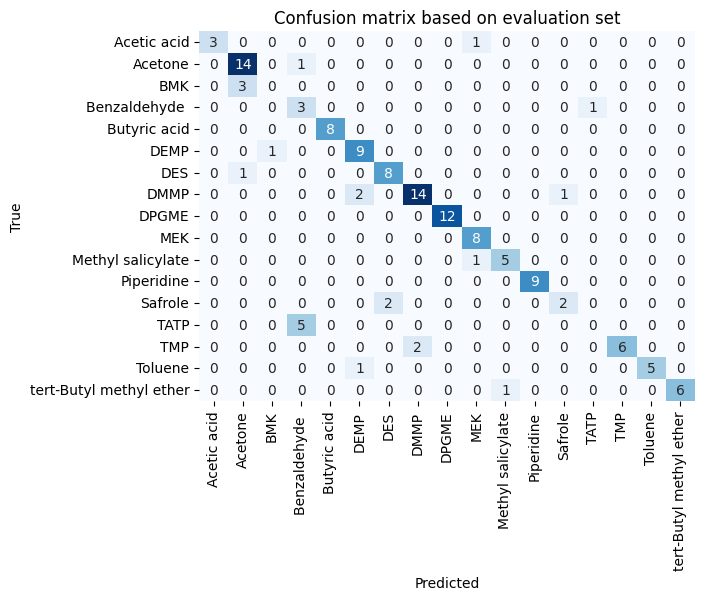

In [10]:
# QEPAS only, PLSDA

# Perform mid-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv',
    feature_selection='plsda'
)
df = DF(DFSettings(), [table1])
df.fuse()
data = df.fused_data
df.fused_data.x_train.columns = ['Substance', '0', '1', '2', '3']
df.fused_data.x_data.columns = ['0', '1', '2', '3']

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

Along with what was observed by Borras et al. in their study, mid-level data fusion seems to work better than low-level data fusion.

Let's try the same using PCA instead of PLSDA for dimensionality reduction.

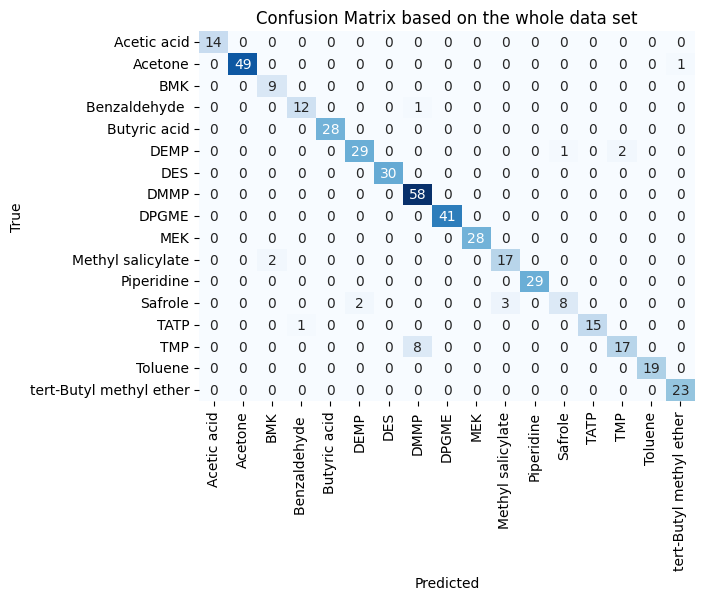

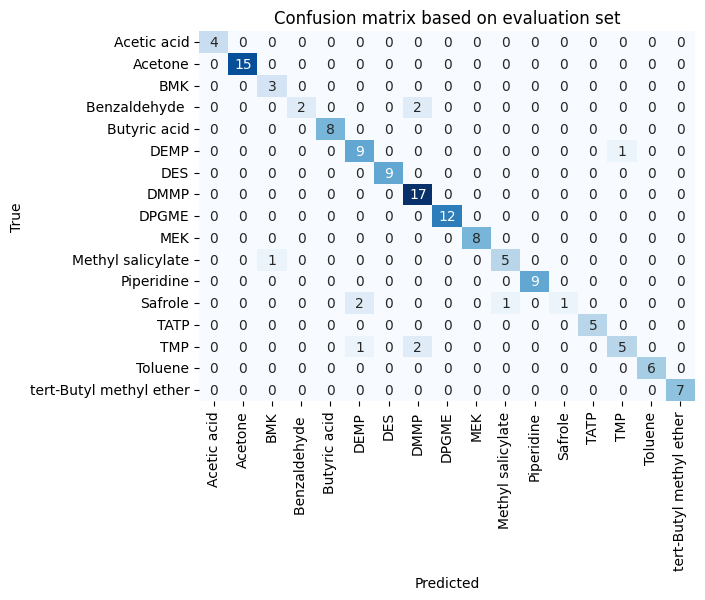

In [11]:
from chemfusekit.pca import PCASettings, PCA

# Perform low-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv'
)
table2 = Table(
    file_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='none'
)
df = DF(DFSettings(), [table1, table2])
df.fuse()
data = df.fused_data

# Reduce the dimensionality of the fused dataset
pca = PCA(PCASettings(), data)
data = pca.rescaled_data

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

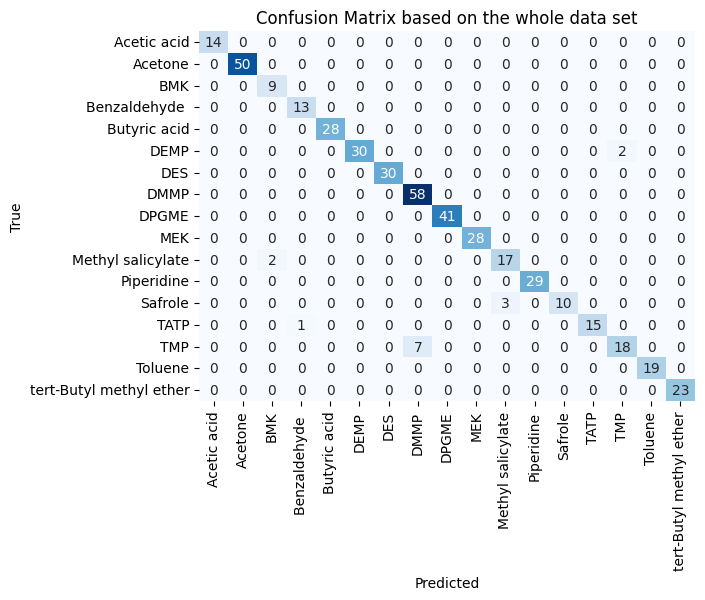

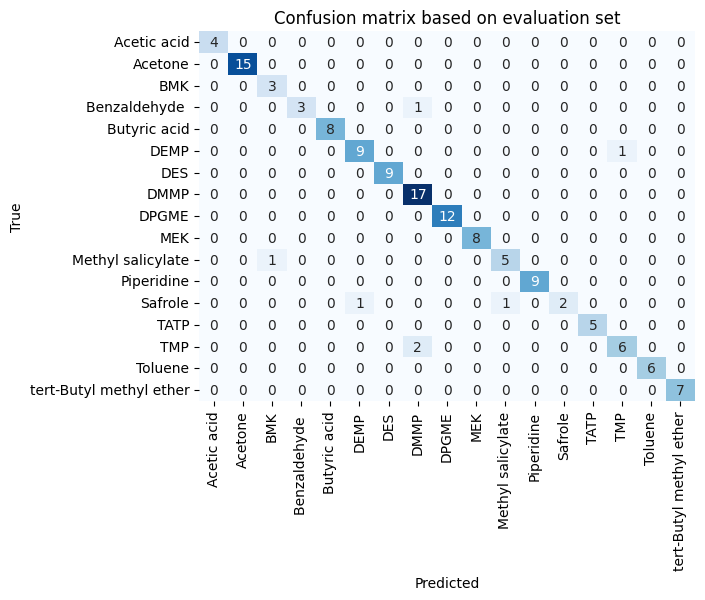

In [12]:
# Perform mid-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv',
    feature_selection='pca'
)
table2 = Table(
    file_path='../tests/rt.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='none'
)
df = DF(DFSettings(), [table1, table2])
df.fuse()
data = df.fused_data

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

## Conclusions

PCA seems to yield a higher precision than PLSDA when run with automatic settings, yet in both cases (PCA and PLSDA) the mid-level and low-level data fusion techniques seem to bring the same exact results in terms of correctly classified samples and scores.

## Last step (to solve a doubt): no data fusion vs data fusion

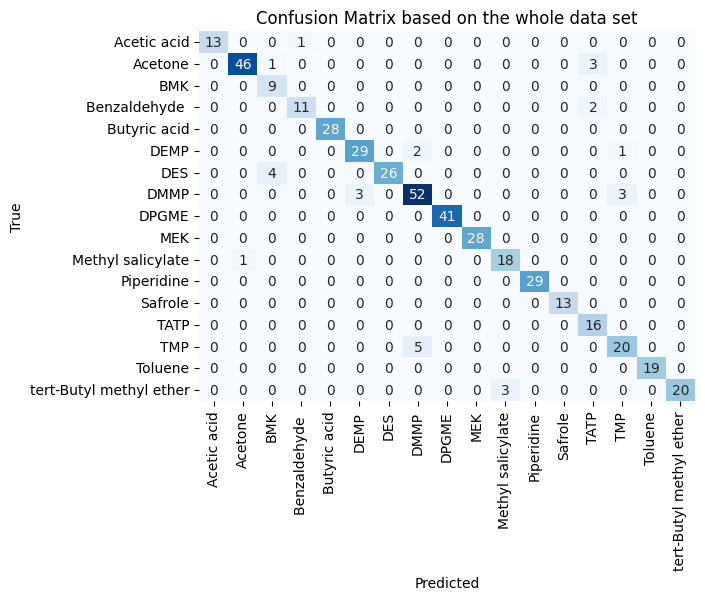

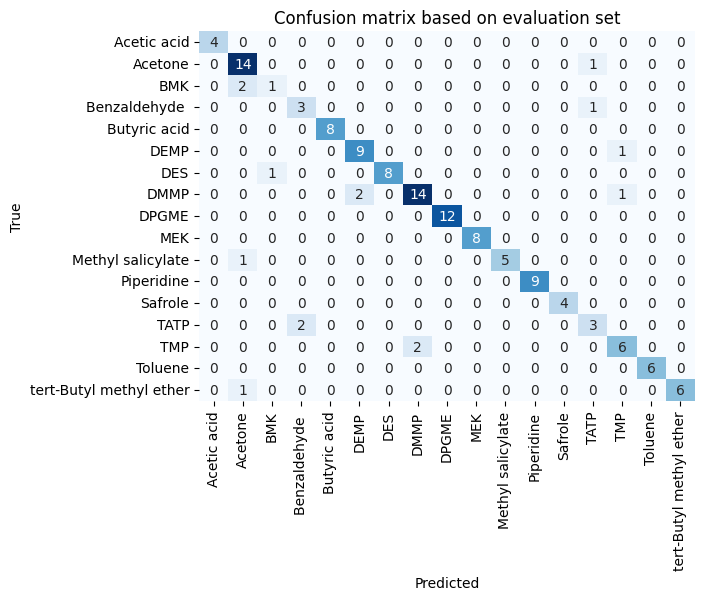

In [13]:
# Perform mid-level data fusion
table1 = Table(
    file_path='../tests/qepas.xlsx',
    sheet_name='Sheet1',
    class_column='Substance',
    preprocessing='snv',
    feature_selection='pca'
)
df = DF(DFSettings(), [table1])
df.fuse()
data = df.fused_data

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True)
knn = KNN(knn_settings, data)
knn.train()

# With another dataset: let's see if the same happens



['DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'DMMP'
 'DMMP' 'DMMP' 'DMMP' 'DMMP' 'acetone' 'acetone' 'acetone' 'acetone'
 'acetone' 'acetone']


/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



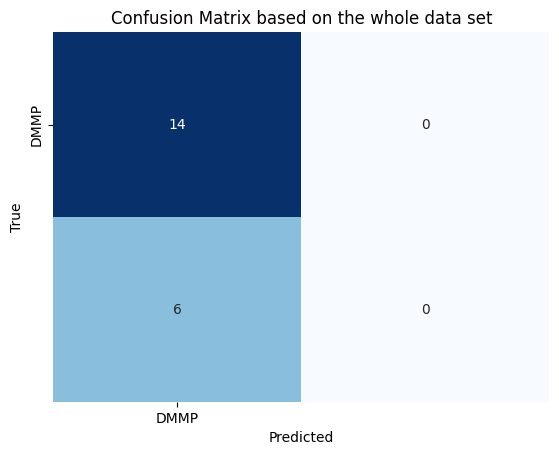

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



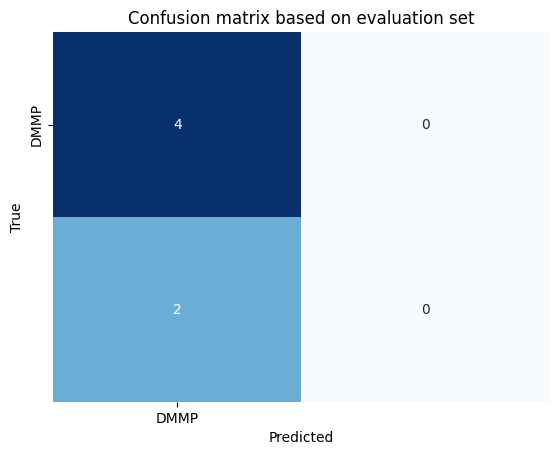

In [15]:
from chemfusekit.df import DFSettings, DF, Table, GraphMode
from chemfusekit.lr import LRSettings, LR
from chemfusekit.pca import PCASettings, PCA

# Set up the import settings for the first table (IMS spectral data)
table1 = Table(
    file_path='./IMS_GC_QEPAS.xlsx',
    sheet_name='IMS',
    preprocessing='snv',
    class_column='Class'
)

# Set up the import settings for the second table (GC chromatography data)
table2 = Table(
    file_path='./IMS_GC_QEPAS.xlsx',
    sheet_name='GC',
    preprocessing='none',
    class_column='Class'
)

# Set up the import settings for the third table (QEPAS spectral data)
table3 = Table(
    file_path='./IMS_GC_QEPAS.xlsx',
    sheet_name='QEPAS',
    preprocessing='snv',
    class_column='Class'
)

# Now, let's make an array of the three tables
# tables = [table1, table2, table3]
df = DF(DFSettings(), [table1, table2, table3])
df.fuse()
data = df.fused_data
print(data.y)

# Reduce the dimensionality of the fused dataset
pca = PCA(PCASettings(), data)
data = pca.rescaled_data

# Set up and perform KNN
knn_settings = KNNSettings(output=GraphMode.GRAPHIC, test_split=True, n_neighbors=14)
knn = KNN(knn_settings, data)
knn.train()

In [ ]:
from chemfusekit.df import DFSettings, DF, Table

# Set up the import settings for the first table (IMS spectral data)
table1 = Table(
    file_path='IMS_GC_QEPAS.xlsx',
    sheet_name='IMS',
    preprocessing='snv',
    class_column='Class',
    index_column='Sample_id',
    feature_selection='pca'
)

# Set up the import settings for the second table (GC chromatography data)
table2 = Table(
    file_path='IMS_GC_QEPAS.xlsx',
    sheet_name='GC',
    preprocessing='none',
    class_column='Class',
    index_column='Sample_id'
)

# Set up the import settings for the third table (QEPAS spectral data)
table3 = Table(
    file_path='IMS_GC_QEPAS.xlsx',
    sheet_name='QEPAS',
    preprocessing='snv',
    class_column='Class',
    index_column='Sample_id',
    feature_selection='pca'
)

# Now, let's make an array of the three tables
df = DF(DFSettings(), [table1, table2, table3])
df.fuse()
data = df.fused_data


# Set up and perform LR
lr_settings = LRSettings(output=GraphMode.GRAPHIC, test_split=True)
lr = LR(lr_settings, data)
lr.train()